In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
CAE_df = pd.read_csv('Dataset/Cluster_Analysis_Example.csv')
CAE_df.head()

,Case No.,x1,x2,x3,x4,x5,x6
0,1,6,4,7,3,2,3
1,2,2,3,1,4,5,4
2,3,7,2,6,4,1,3
3,4,4,6,4,5,3,6
4,5,1,3,2,2,6,4


In [69]:
CAE_df.set_index(CAE_df['Case No.']).head(1)

,Case No.,x1,x2,x3,x4,x5,x6
Case No.,,,,,,,
1,1,6,4,7,3,2,3


In [70]:
cae_df_new = CAE_df.drop(['Case No.'],axis = 1)

In [71]:
cae_df_new.head()

,x1,x2,x3,x4,x5,x6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4


In [72]:
#cae_df_new_linkage = linkage?

In [73]:
cae_df_new_linkage = linkage(cae_df_new,'ward')

In [74]:
linkage_df = pd.DataFrame(cae_df_new_linkage)

In [75]:
cae_df_new

,x1,x2,x3,x4,x5,x6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4
5,6,4,6,3,3,4
6,5,3,6,3,3,4
7,7,3,7,4,1,4
8,2,4,3,3,6,3
9,3,5,3,6,4,6


In [76]:
linkage?

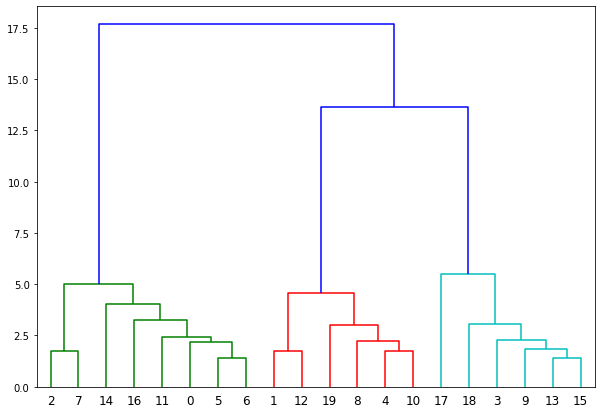

In [77]:
plt.figure(figsize=(10,7))
dendrogram(cae_df_new_linkage, orientation = 'top',distance_sort='descending',show_leaf_counts=True)
plt.show()

# K_MEANS

In [78]:
mymodel = KMeans(n_clusters=4).fit(cae_df_new)
clusterid = mymodel.predict(cae_df_new)
clusterid = pd.DataFrame(clusterid)
cae_df_new['clusterid']= clusterid

In [79]:
cluster_1 = cae_df_new[cae_df_new['clusterid']==1]
cluster_1

,x1,x2,x3,x4,x5,x6,clusterid
0,6,4,7,3,2,3,1
2,7,2,6,4,1,3,1
5,6,4,6,3,3,4,1
6,5,3,6,3,3,4,1
7,7,3,7,4,1,4,1
11,5,4,5,4,2,4,1
14,6,5,4,2,1,4,1
16,4,4,7,2,2,5,1


In [80]:
cluster_2 = cae_df_new[cae_df_new['clusterid']==1]
cluster_2.x1.mean()

5.75

In [81]:
cluster_3 = cae_df_new[cae_df_new['clusterid']==2]
cluster_3

,x1,x2,x3,x4,x5,x6,clusterid
3,4,6,4,5,3,6,2
9,3,5,3,6,4,6,2
13,4,6,4,6,4,7,2
15,3,5,4,6,4,7,2
18,4,6,3,7,2,7,2


In [82]:
myclusters = mymodel.cluster_centers_
myclusters = pd.DataFrame(myclusters)
myclusters

,0,1,2,3,4,5
0,3.000000,7.000,2.000000,6.000,4.000,3.000000
1,5.750000,3.625,6.000000,3.125,1.875,3.875000
2,3.600000,5.600,3.600000,6.000,3.400,6.600000
3,1.666667,3.000,1.833333,3.500,5.500,3.333333


In [83]:
cae_df_new.iloc[:,:6]

,x1,x2,x3,x4,x5,x6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4
5,6,4,6,3,3,4
6,5,3,6,3,3,4
7,7,3,7,4,1,4
8,2,4,3,3,6,3
9,3,5,3,6,4,6


In [84]:
cluster_id = mymodel.predict(cae_df_new.iloc[:,:6])
sil_avg = silhouette_score(cae_df_new,cluster_id)


In [85]:
sil_avg

0.5060889134390812

In [86]:
silhouette_values = silhouette_samples(cae_df_new.iloc[:,:6],clusterid)

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
silhouette_values

array([0.61234753, 0.50168278, 0.54337055, 0.46339368, 0.56970544,
       0.56048933, 0.5372508 , 0.56025675, 0.45198102, 0.43349245,
       0.58454141, 0.40205251, 0.37401521, 0.59514495, 0.38528262,
       0.597216  , 0.42568587, 0.        , 0.45130943, 0.45960008])

In [88]:
sil_val_df = pd.DataFrame(silhouette_values, columns=['Sil Width'])

In [89]:
sil_val_df

,Sil Width
0,0.612348
1,0.501683
2,0.543371
3,0.463394
4,0.569705
5,0.560489
6,0.537251
7,0.560257
8,0.451981
9,0.433492


In [91]:
KMeans.predict?

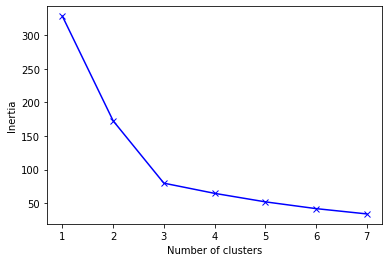

In [96]:
Sum_of_sq_dist = []
K = range(1,8)
for k in K:
    myKMeans = KMeans(n_clusters=k)
    myKMeans = myKMeans.fit(cae_df_new.iloc[:,:6])
    Sum_of_sq_dist.append(myKMeans.inertia_)

plt.plot(K,Sum_of_sq_dist,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Excercise

In [118]:
ex1_df = pd.read_excel('Dataset/Cluster_Analysis_Exercise.xlsx')
ex1_df.head()

,Country,Area,GDP,Inflation,Life_expectancy,Military,Population_growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [119]:
ex1_df_new = ex1_df.drop(['Country'],axis=1)

In [120]:
ex1_df_new.shape

(28, 7)

In [122]:
ex1_df_new.head()

,Area,GDP,Inflation,Life_expectancy,Military,Population_growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [123]:
from sklearn.preprocessing import StandardScaler as s

In [124]:
ex1_df_z = s().fit_transform(ex1_df_new)

In [126]:
ex1_df_z_df = pd.DataFrame(ex1_df_z,columns=ex1_df_new.columns)

In [132]:
ex1_df_z_df.head()

,Area,GDP,Inflation,Life_expectancy,Military,Population_growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973
3,-0.675636,-0.973310,-0.759511,-0.680942,0.996208,-0.420236,1.693357
4,-0.538618,-0.334301,-1.050830,-0.237093,-0.579571,-0.501385,-0.309438


In [134]:
myModel = KMeans(n_clusters=6).fit(ex1_df_z_df)
myModel = myModel.predict(ex1_df_z_df)
sil_avg = silhouette_score(ex1_df_z_df,myModel)
sil_avg

0.25938511910897943

In [136]:
sil_sample = silhouette_samples(ex1_df_z_df,myModel)
sil_sample

array([0.13396242, 0.1123813 , 0.36628676, 0.18668593, 0.11156388,
       0.15506502, 0.48570569, 0.48860716, 0.43818429, 0.        ,
       0.48951389, 0.22195093, 0.14251768, 0.40593223, 0.5021745 ,
       0.48768726, 0.19733921, 0.11586436, 0.23781494, 0.19332551,
       0.18283799, 0.39521737, 0.26707196, 0.        , 0.49157615,
       0.16492044, 0.        , 0.28859647])

In [139]:
sos = []
K = range(3,9)

for k in K:
    myKmeans = KMeans(n_clusters=k)
    myKMeans = myKMeans.fit(ex1_df_z_df)
    sos.append(myKMeans.inertia_)

sos

[51.79202263470737,
 51.39435614411774,
 51.39435614411774,
 51.341815773343455,
 51.48787195591882,
 51.73408158896571]

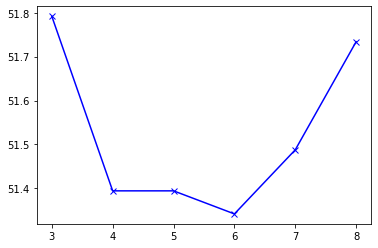

In [140]:
plt.plot(K,sos,'bx-')
plt.show()

In [117]:
myModel = KMeans(n_clusters=3).fit(ex1_df_new)
myModel = myModel.predict(ex1_df_new)
cluster_df = pd.DataFrame(myModel)
cluster_df

,0
0,1
1,0
2,1
3,2
4,0
5,1
6,1
7,1
8,0
9,2


In [ ]:
sil_score = S